In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
allData = pd.read_csv('Admission_Predict.csv')

In [9]:
"Let's first explore the data to see what it looks like."

"Let's first explore the data to see what it looks like. We will extract the types of the data and get counts."

In [11]:
allData.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
allData.count()

Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [27]:
allData.isnull().values.any() #There are no null values in the data; we don't have any missing data.
#allData = allData.drop(['Serial No.'], axis=1)
allData.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

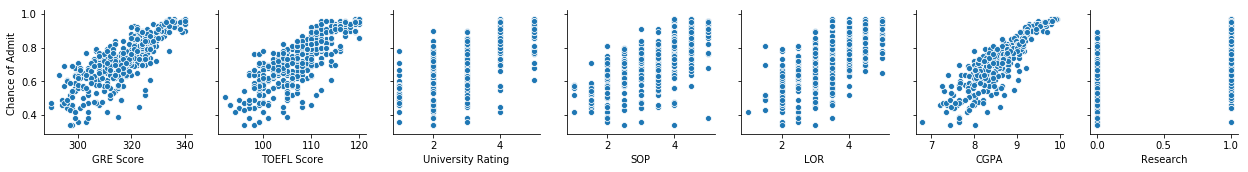

In [39]:
sns.pairplot(allData, y_vars=['Chance of Admit '], x_vars=['GRE Score', 
                                                          'TOEFL Score', 
                                                          'University Rating', 
                                                          'SOP', 
                                                          'LOR ', 
                                                          'CGPA', 
                                                          'Research'])



From visual inspection of the last row, we see that there is a positive correlation with GRE Score, TOEFL Score, and CGPA. However it doesn't seem like there is a significant correlation with the other variables. Regardless, I am convinced that there is some relation between the independent and depended variables, so let us construct a multiple linear model.

H0 NULL HYPOTHESIS: There is no influence of the covariates on the model, that is B1 = B2 = ... = BN = 0. So, GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research will have no influence on the Chance of Admittance.

H1 ALT. HYPOTHESIS: At least one of the covariates of the model is not 0, Bi for i in {1 ... n} /= 0. So, at least one of GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research will have an influence on the Change of Admittance.

Significance level: 95%

yi = B0 + B1x1 + B2x2 + B3x3 + B4x4 + B5x5 + B6x6 + B7x7 + e

B0: The intercept
B1: GRE Score estimate
B2: TOEFL Score estimate
B3: University Rating estimate
B4: SOP Estimate
B5: LOR Estimate
B6: CGPA Estimate
B7: Research estimate

In [63]:
y = allData['Chance of Admit ']
x = allData.drop(['Chance of Admit '], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [64]:
x_train.insert(0, "Constant", 1)

In [73]:
B = np.matmul(np.matmul(inv(np.matmul(x_train.T, x_train)),x_train.T), y_train)
print(B)

[-1.19529912  0.001762    0.00140497  0.00453209 -0.0090618   0.0318262
  0.12788195  0.03153732]


yHat = -1.1953 + 0.0018B1 + 0.0014B2 + 0.0045B3 - 0.0091B4 + 0.0318B5 + 0.1279B6 + 0.0315B7

In [77]:
yHat = np.matmul(x_train,B)

In [88]:
results = y_train.to_frame()
results.insert(1, "Predicted Chance of Admit", yHat)

In [96]:
SSE = 0 


for index,row in results.iterrows():
    error = (row['Chance of Admit '] - row['Predicted Chance of Admit'])**2
    SSE += error
    
print(SSE)

1.0729024589075449